<a href="https://colab.research.google.com/github/George0982/RNN_Predicao_Serie_Temporal_de_Valor_Cafe/blob/main/RNN_Predicao_Serie_Temporal_de_Valor_Cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A fonte possui o valor de fechamento do café nos anos de 2002 a 2023, onde através dessa série temporal, pretende-se fazer uma nova predição, comparando a assertividade entre treino e teste.

In [10]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [11]:
#Fonte do dataset: 'https://raw.githubusercontent.com/George0982/RNN_Predicao_Serie_Temporal_de_Valor_Cafe/main/VALORCAFE2002_2023_CEPEA.csv'
#Utilização de 20% dos dados para teste
#Utilização da escala Min Max 0.1

def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/George0982/RNN_Predicao_Serie_Temporal_de_Valor_Cafe/main/VALORCAFE2002_2023_CEPEA.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [12]:
len(train_data)

4348

In [13]:
#Dividindo a série temporal em vetores
#Considerando o número de steps passados como quantidade de steps futuros

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [14]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=1, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)

Epoch 1/20
362/362 - 2s - loss: 0.0010 - val_loss: 0.0588 - 2s/epoch - 6ms/step
Epoch 2/20
362/362 - 1s - loss: 6.4440e-04 - val_loss: 0.0520 - 866ms/epoch - 2ms/step
Epoch 3/20
362/362 - 1s - loss: 4.8259e-04 - val_loss: 0.0468 - 859ms/epoch - 2ms/step
Epoch 4/20
362/362 - 1s - loss: 3.4625e-04 - val_loss: 0.0385 - 860ms/epoch - 2ms/step
Epoch 5/20
362/362 - 1s - loss: 2.5643e-04 - val_loss: 0.0331 - 849ms/epoch - 2ms/step
Epoch 6/20
362/362 - 1s - loss: 1.9886e-04 - val_loss: 0.0303 - 826ms/epoch - 2ms/step
Epoch 7/20
362/362 - 1s - loss: 1.5825e-04 - val_loss: 0.0263 - 853ms/epoch - 2ms/step
Epoch 8/20
362/362 - 1s - loss: 1.2904e-04 - val_loss: 0.0240 - 850ms/epoch - 2ms/step
Epoch 9/20
362/362 - 1s - loss: 1.0288e-04 - val_loss: 0.0243 - 1s/epoch - 3ms/step
Epoch 10/20
362/362 - 1s - loss: 1.0041e-04 - val_loss: 0.0210 - 914ms/epoch - 3ms/step
Epoch 11/20
362/362 - 1s - loss: 8.7439e-05 - val_loss: 0.0205 - 857ms/epoch - 2ms/step
Epoch 12/20
362/362 - 1s - loss: 8.2187e-05 - val_l

In [15]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

3/3 [==============================] - 0s 3ms/step
Raíz do Erro Médio Quadrático para Treino: 0.008
Raíz do Erro Médio Quadrático para Teste: 0.127


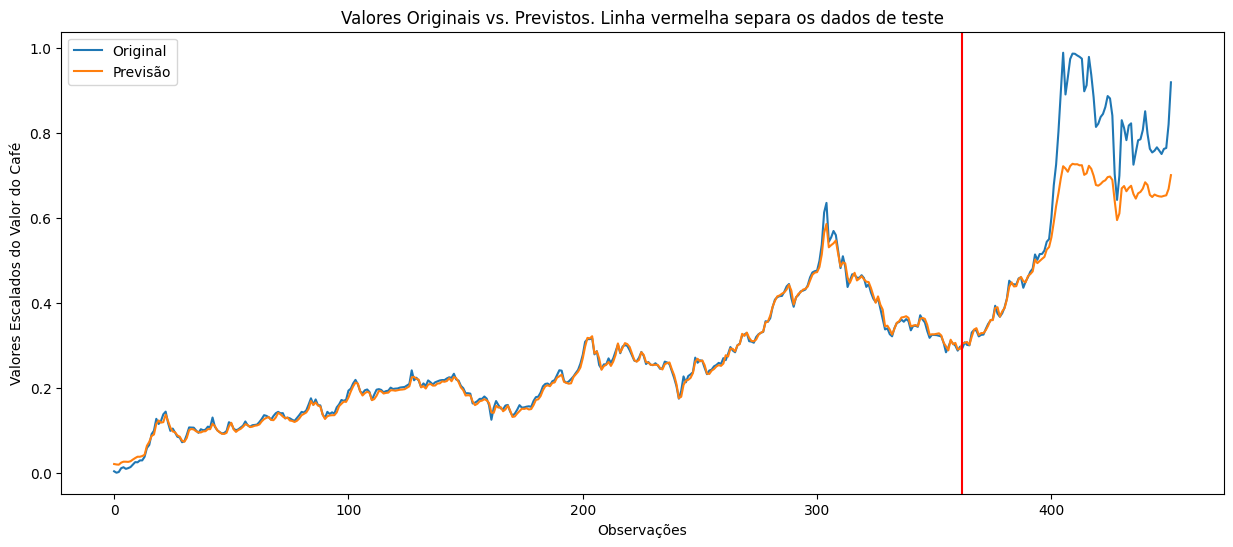

In [17]:
#Comparando a série Temporal Com a Previsão

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=100)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados do Valor do Café')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')
plot_result(trainY, testY, train_predict, test_predict)